In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Generate synthetic non-linear data with 3 variables


In [ ]:
class CustomNeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        # Initialize weights and biases
        self.W1 = torch.randn(input_size, hidden1_size) * np.sqrt(2.0/input_size)
        self.b1 = torch.zeros(hidden1_size)

        self.W2 = torch.randn(hidden1_size, hidden2_size) * np.sqrt(2.0/hidden1_size)
        self.b2 = torch.zeros(hidden2_size)

        self.W3 = torch.randn(hidden2_size, output_size) * np.sqrt(2.0/hidden2_size)
        self.b3 = torch.zeros(output_size)

        # Enable gradient tracking
        self.W1.requires_grad_()
        self.b1.requires_grad_()
        self.W2.requires_grad_()
        self.b2.requires_grad_()
        self.W3.requires_grad_()
        self.b3.requires_grad_()

    def relu(self, x):
        return torch.maximum(torch.tensor(0.0), x)

    def forward(self, x):
        self.z1 = torch.mm(x, self.W1) + self.b1
        self.a1 = self.relu(self.z1)

        self.z2 = torch.mm(self.a1, self.W2) + self.b2
        self.a2 = self.relu(self.z2)

        self.z3 = torch.mm(self.a2, self.W3) + self.b3

        return self.z3

    def get_params(self):
        return [self.W1, self.b1, self.W2, self.b2, self.W3, self.b3]

    def zero_grad(self):
        for param in self.get_params():
            if param.grad is not None:
                param.grad.zero_()


In [ ]:
def train_model(model, X_train, y_train, learning_rate=0.01, epochs=1000):
    losses = []

    for epoch in range(epochs):
        y_pred = model.forward(X_train)
        loss = torch.mean((y_pred - y_train)**2)
        losses.append(loss.item())

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            for param in model.get_params():
                param -= learning_rate * param.grad

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

    return losses

In [ ]:
def generate_data(n_samples=1000):
    X1 = np.random.uniform(-5, 5, n_samples)
    X2 = np.random.uniform(-5, 5, n_samples)
    X3 = np.random.uniform(-5, 5, n_samples)
    y = (2 * np.sin(X1) + 0.5 * X2**2 + 0.3 * X3**3 +
         np.cos(X1 * X2) + np.random.normal(0, 0.2, n_samples))
    X = np.column_stack((X1, X2, X3))
    return torch.FloatTensor(X), torch.FloatTensor(y.reshape(-1, 1))

# Generate data

In [ ]:
X_train, y_train = generate_data(1000)

# Create and train model


In [ ]:
model = CustomNeuralNetwork(input_size=3, hidden1_size=64, hidden2_size=32, output_size=1)
losses = train_model(model, X_train, y_train, learning_rate=0.01, epochs=1000)

Epoch 0, Loss: 195.5516
Epoch 100, Loss: 48.1771
Epoch 200, Loss: 39.2848
Epoch 300, Loss: 35.1605
Epoch 400, Loss: 31.6309
Epoch 500, Loss: 28.9361
Epoch 600, Loss: 26.4773
Epoch 700, Loss: 24.4533
Epoch 800, Loss: 22.6129
Epoch 900, Loss: 20.8905


# Create 4D scatter plot

In [ ]:
def plot_4d_scatter():
    fig = plt.figure(figsize=(20, 5))
    ax1 = fig.add_subplot(131)
    ax1.plot(losses)
    ax1.set_title('Training Loss over Epochs')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_yscale('log')
    ax2 = fig.add_subplot(132, projection='3d')
    with torch.no_grad():
        y_pred = model.forward(X_train)
    scatter = ax2.scatter(X_train[:, 0],
                         X_train[:, 1],
                         X_train[:, 2],
                         c=y_pred.numpy(),
                         cmap='viridis')
    plt.colorbar(scatter, label='Predicted Value')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_zlabel('X3')
    ax2.set_title('4D Scatter Plot\n(Color represents predicted value)')
    ax3 = fig.add_subplot(133)
    ax3.scatter(y_train.numpy(), y_pred.numpy(), alpha=0.5)
    ax3.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    ax3.set_xlabel('Actual Values')
    ax3.set_ylabel('Predicted Values')
    ax3.set_title('Actual vs Predicted Values')
    plt.tight_layout()
    plt.show()

# Plot results

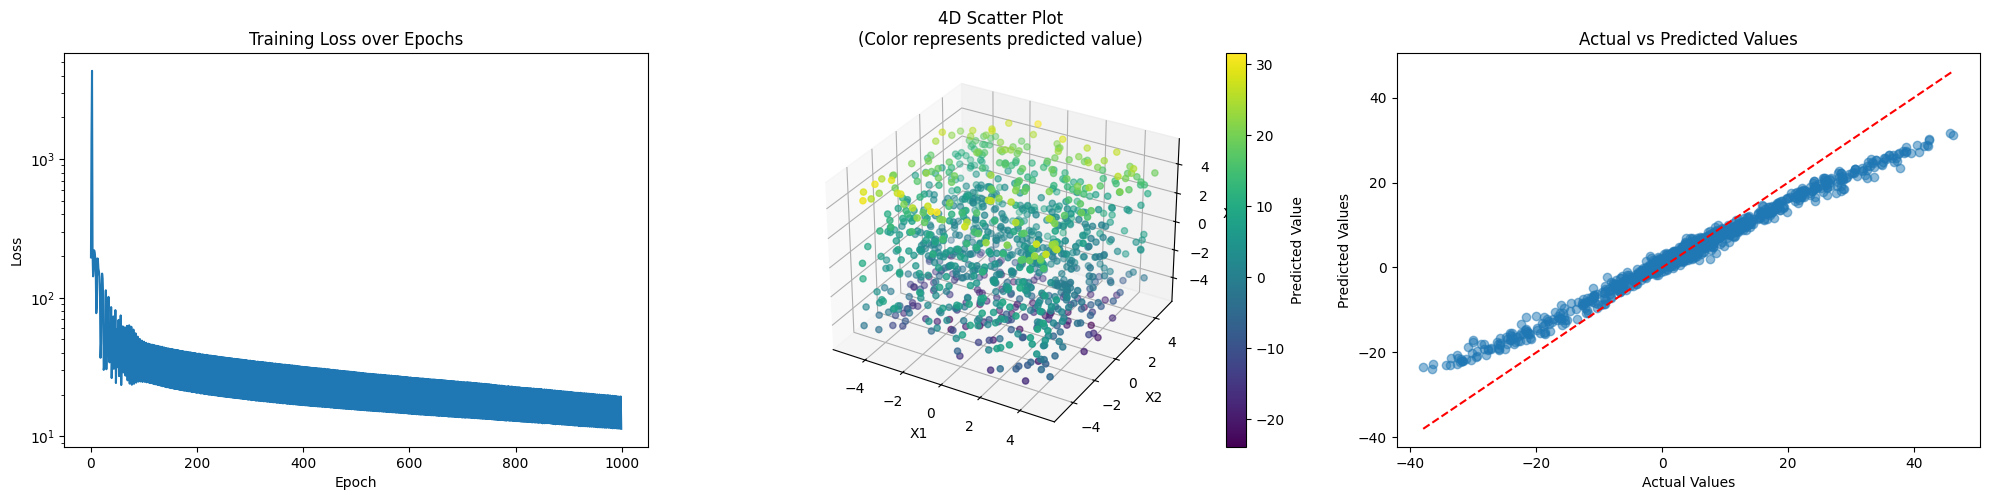

In [ ]:
plot_4d_scatter()

# Test the model on new data

In [ ]:
def test_model(model, x1, x2, x3):
    with torch.no_grad():
        x_tensor = torch.FloatTensor([[x1, x2, x3]])
        prediction = model.forward(x_tensor)
        return prediction.item()
test_points = [
    (-4, -4, -4),
    (-2, -2, -2),
    (0, 0, 0),
    (2, 2, 2),
    (4, 4, 4)
]
for x1, x2, x3 in test_points:
    pred = test_model(model, x1, x2, x3)
    actual = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    print(f"Input: ({x1}, {x2}, {x3})")
    print(f"Prediction: {pred:.3f}")
    print(f"Actual: {actual:.3f}\n")


Test Predictions:
Input: (-4, -4, -4)
Prediction: -4.731
Actual: -10.644

Input: (-2, -2, -2)
Prediction: -1.341
Actual: -2.872

Input: (0, 0, 0)
Prediction: 1.786
Actual: 1.000

Input: (2, 2, 2)
Prediction: 4.178
Actual: 5.565

Input: (4, 4, 4)
Prediction: 20.520
Actual: 24.729

